# 

# !pip install pynput
!pip install pyautogui
!pip install pytesseract
!pip install opencv-python
!pip install keyboard

In [2]:
from image_utils import *
import pytesseract

In [3]:
# 1920x1080
# (2400,0) (4800,1350)

In [4]:
monitor_mode = 'wide'

In [5]:
screenshot = pyautogui.screenshot(region=None, allScreens=True)
if monitor_mode == 'normal':
    game_left_top = image_detection(screenshot, image_path_list=['./image/game_scr.png'], confidence=0.6, merge_thres=50, show=False, location='left_top')
    monitor_scale = 1
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
elif monitor_mode == 'wide':
    game_left_top = image_detection(screenshot, image_path_list=['./image/game_scr_wide.png'], confidence=0.7, merge_thres=50, show=False, location='left_top')
    monitor_scale = 1.25
    pytesseract.pytesseract.tesseract_cmd = 'D:/program/Tesseract-OCR/tesseract.exe'

In [6]:
game_region = (game_left_top[0][0], game_left_top[0][1], 1200, 900)
hpmp_cut_region = (1002, 750, 172, 50)
left_coord_cut_region = (999, 850, 75, 23)
right_coord_cut_region = (1082, 850, 75, 23)
game_screen_region = (25,20,765,675)
message_region = (820,565,345,123)
mapname_region = (320,0,170,20)

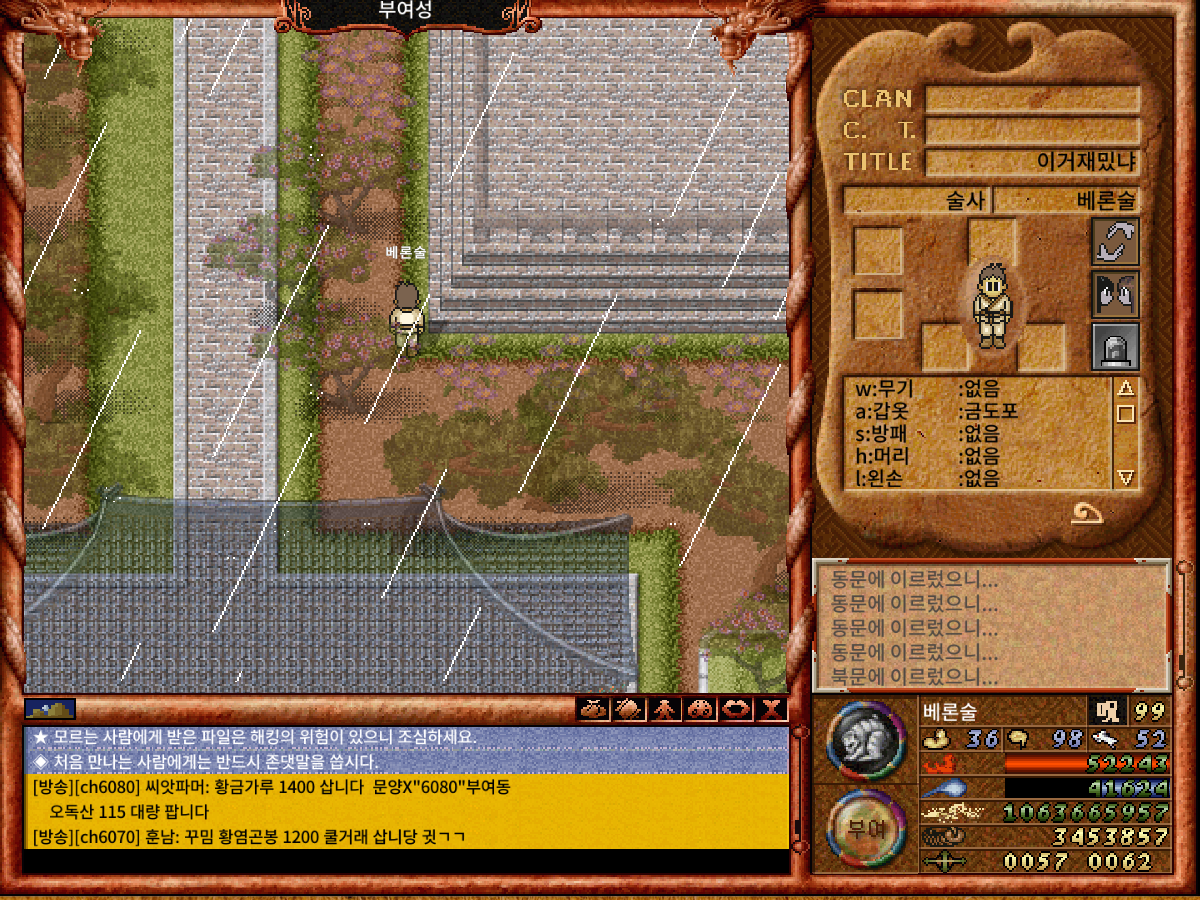

In [30]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
screenshot

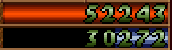

In [8]:
capture_and_crop(screenshot, hpmp_cut_region)

In [9]:
capture_and_crop(screenshot, left_coord_cut_region)

In [10]:
capture_and_crop(screenshot, right_coord_cut_region)

_ 헬 파 이 어 를 외 웠습니다.

_ 경 험 치가 450000(09%) 올 랐 습니다,
동 문 에 이 르 렀 으나.

. 동 문 에 이 르 렀 으니...

. 동 문 에 이 르 렀 으 니 ..,



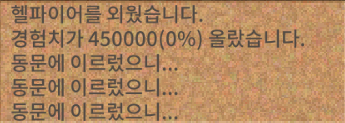

In [78]:
print(extract_text_from_image(capture_and_crop(screenshot, message_region), cut_region=(1), config=r'--oem 1 --psm 6'))
capture_and_crop(screenshot, message_region)

In [80]:
print(extract_text_from_image(capture_and_crop(screenshot, mapname_region), cut_region=(1), config=r'--oem 1 --psm 6').replace(' ',''))
capture_and_crop(screenshot, mapname_region)

동부여성



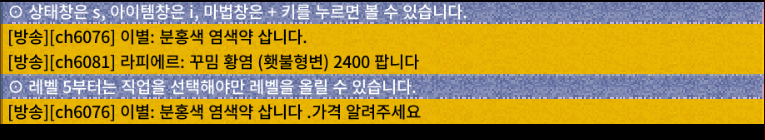

In [82]:
capture_and_crop(screenshot, (25,725, 765, 140))

## 왕퀘 테스트

In [11]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
guard = image_detection(screenshot, image_path_list=['./image/guard.png'], confidence=0.6, merge_thres=50, show=True, location='center')[0]
guard

(403, 279)

In [12]:
kingq_region_cut = (guard[0]+40, guard[1]-40, 380, 300)

In [181]:
king_coord = image_detection(screenshot, ['./image/king.png'], 0.6, show=False)

In [183]:
king_coord

[(542, 122)]

In [15]:
# 첫 번째 좌표로 마우스 이동
target_x = game_region[0] + round(king_coord[0][0])
target_y = game_region[1] + round(king_coord[0][1])

NameError: name 'king_coord' is not defined

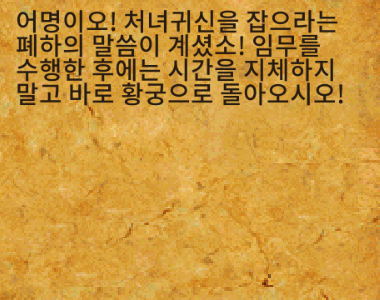

'어명이오!처녀귀신을잡으라는\n폐하의말씀이계셨소!임무를\n수행한후에는시간을지체하지\n말고바로황궁으로돌아오시오!\n'

In [17]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

In [7]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

"고.둘각|\n\n'29031`\n\n'!\n|,받겠습니다.\n무서워서안되겠어요.\n"

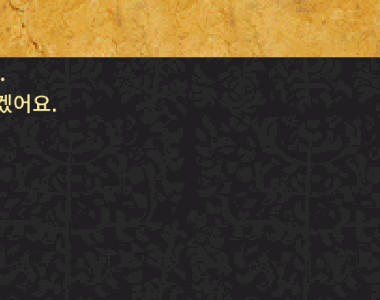

'어요.\n'

In [41]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

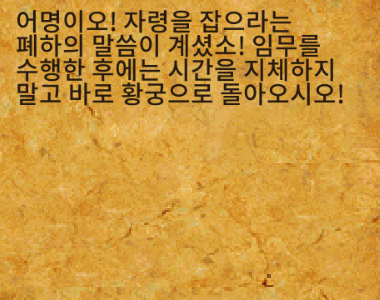

'어명이오!자령을잡으라는\n\n폐하의말씀이계셨소!임무를\n수행한후에는시간을지체하지\n말고바로황궁으로돌아오시오!\n'

In [42]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

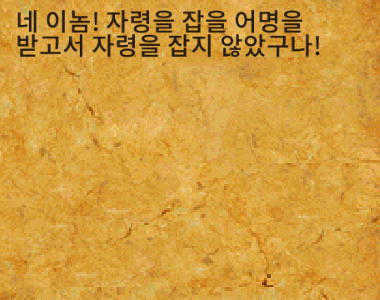

'네이놈!자령을잡을어명을\n받고서자령을잡지않았구나!\n`\n'

In [43]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

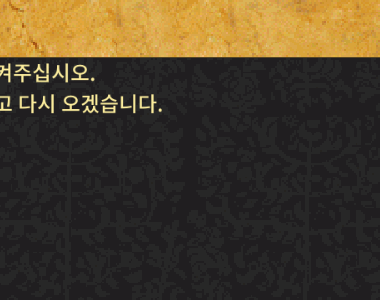

'주십시오.\n]다시오겠습니다.\n'

In [44]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

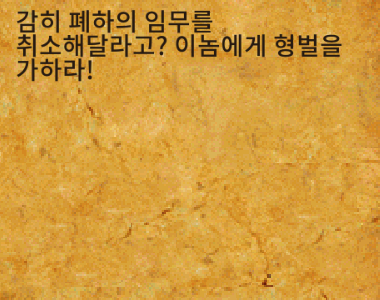

'감히폐하의임무를:\n취소해달라고?이놈에게형벌을\n가하라!\n\n`\n'

In [45]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

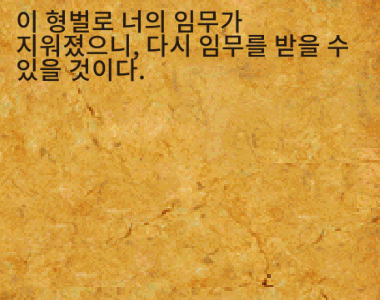

'이형벌로너의임무가:\n지워졌으니,다시임무를받을수\n있을것이다.\n\n`\n'

In [46]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

In [46]:
['무례', '폐하께', '어요', '명', 'target', '다시', '취소', '형벌']

'네이놈!처녀귀신을.잡을어명을\n받고서처녀귀신을잡지\n않았구나!\n'

## 자동이동 테스트

In [32]:
screenshot_cut_lc = capture_and_crop(screenshot, left_coord_cut_region)
screenshot_cut_lc

In [34]:
screenshot_cut_rc = capture_and_crop(screenshot, right_coord_cut_region)
screenshot_cut_rc

In [36]:
(cur_x, cur_y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)

In [38]:
(cur_x, cur_y) 

(57, 2)

In [45]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
game_screen = capture_and_crop(screenshot, game_screen_region)

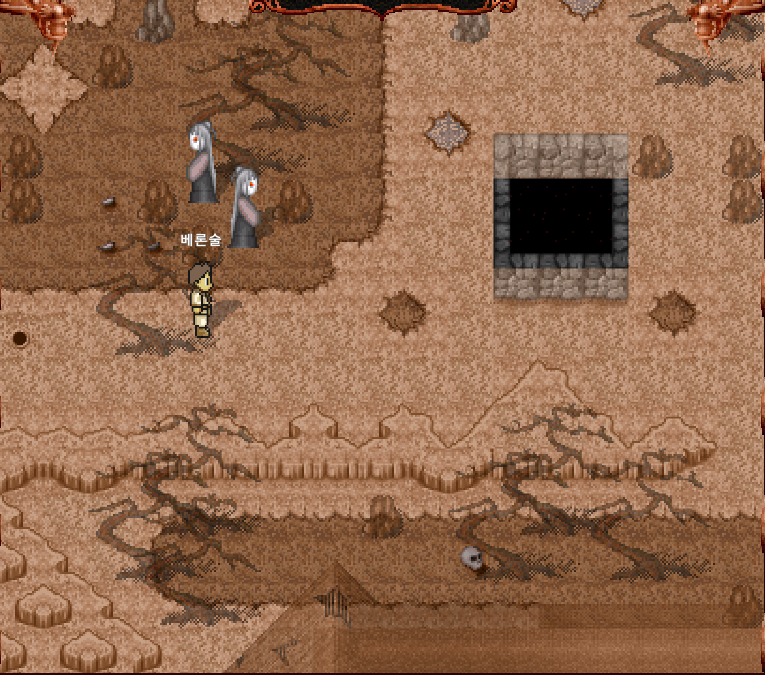

In [47]:
game_screen

In [62]:
cn = image_detection(game_screen, image_path_list=['./image/cn_back.png', './image/cn_left.png', './image/cn_right.png', './image/cn_front.png'], confidence=0.7, merge_thres=45, show=True, location='bottom')

In [64]:
me = image_detection(game_screen, image_path_list=['./image/me_back.png', './image/me_left.png', './image/me_right.png', './image/me_front.png'], confidence=0.65, merge_thres=45, show=True, location='bottom') 

In [66]:
# 공격가능범위
# 가로 9칸 세로 8칸

In [ ]:
                    # nearest_x, nearest_y = (0, 0)
                    # dist = 10000
                    # for x,y in avail_cn:
                    #     n_dist = abs(me[0][0] - x) + abs(me[0][1] - y)
                    #     if n_dist < dist:
                    #         dist = n_dist
                    #         nearest_x, nearest_y = (x, y)
                    # target_x = self.game_region[0] + self.game_screen_region[0] + nearest_x
                    # target_y = self.game_region[1] + self.game_screen_region[1] + nearest_y
                    # if not self.state['macro_running'] or not self.state['macro_type']==macro_type:
                    #     print('macro stop')
                    #     raise
                    # self.active_spell_auto(skill_name='tab', macro_type=macro_type, target_iter=[1], active_iter=1, change_dir=False, auto_bomu=False, auto_mabi=False, mouse_target=(target_x, target_y))
                    # time.sleep(0.1)
                    # extracted_text = extract_text_from_image(self.game_region, cut_region=self.message_region, config=r'--oem 1 --psm 6')
                    # extracted_text = extracted_text.replace(' ','')
                    # print(extracted_text)
                    # if '처녀' in extracted_text:
                    #     # self.active_spell_auto(skill_name='curse', macro_type=macro_type, target_iter=[1], active_iter=1, change_dir=False, auto_bomu=False, auto_mabi=False, direction='stay')
                    #     self.active_spell_auto(skill_name='hellfire', macro_type=macro_type, target_iter=[1], active_iter=1, change_dir=False, auto_bomu=False, auto_mabi=False, direction='stay')
                    #     time.sleep(5)

In [ ]:

def extract_coor():
    global modified_image1, modified_image2
    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image1, scale=5)

    # OCR을 사용하여 텍스트 추출
    extracted_text1 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)
    
    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image2, scale=5)

    # OCR을 사용하여 텍스트 추출
    extracted_text2 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)
    # print(f"현재 좌표: ({extracted_text1}, {extracted_text2})")
    label.config(text=f"현재 좌표: ({extracted_text1}, {extracted_text2})")
    label.after(100, extract_coor)  # 100ms마다 좌표 업데이트

# Tkinter GUI 설정
root = tk.Tk()
root.title("캐릭터 좌표 확인")

# 현재 마우스 위치 얻기
mouse_x, mouse_y = pyautogui.position()

# Tkinter 창의 위치 설정
# "+x+y" 형식으로 좌표 지정
root.geometry(f"300x240+{mouse_x}+{mouse_y}")

label = tk.Label(root, text="현재 좌표: (0, 0)", font=("Arial", 10))
label.pack(pady=20)

modified_image1 = find_coord(region, cut_start=(802,682), cut_end=(858,700))
modified_image2 = find_coord(region, cut_start=(865,682), cut_end=(930,700))

# 좌표 업데이트 함수 호출
extract_coor()

root.mainloop()